# Project Overview

This project is dedicated to the prediction of diabetes, specifically, the presence or absence of diabetes in individuals. Our approach is rooted in the realm of machine learning, providing a systematic and comprehensive framework.

## Methodology

Our methodology is built upon a well-structured workflow that harmoniously integrates several vital components:

1. **Data Preprocessing**: We commence by preparing our dataset, ensuring it is clean, properly formatted, and ready for analysis.

2. **Exploratory Data Analysis (EDA)**: The project proceeds with a thorough exploration of the dataset. EDA allows us to uncover patterns, insights, and relationships within the data.

3. **Development of a Neural Network Model**: The core of our project lies in the creation and training of a neural network model. This model is designed to harness the power of machine learning to make accurate predictions regarding diabetes.

By following this systematic workflow, we aim to achieve accurate predictions and gain valuable insights into the factors contributing to diabetes.

This project not only showcases the predictive capabilities of machine learning but also serves as a testament to the importance of data preprocessing and exploratory data analysis in building robust models for real-world problems.


## Importing Libraries and Dataset

In this project, we begin by importing the necessary Python libraries and loading the dataset. These libraries serve as the foundation for our data analysis and machine learning tasks. The dataset, 'diabetes.csv,' contains valuable information related to diabetes that we will use for our analysis and predictions.

Let's start by importing the essential libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Read the 'diabetes.csv' file and create a Pandas DataFrame.

df = pd.read_csv('diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis (EDA)


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
len(df[df['Outcome'] == 1]), len(df[df['Outcome'] == 0])

(268, 500)

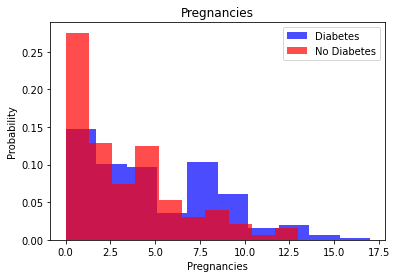

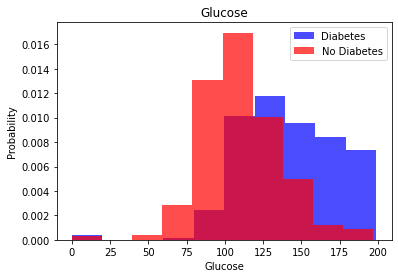

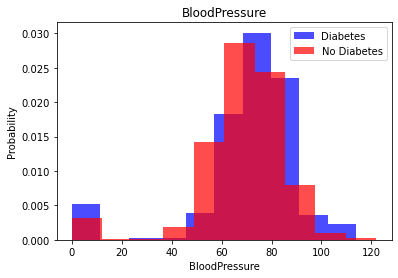

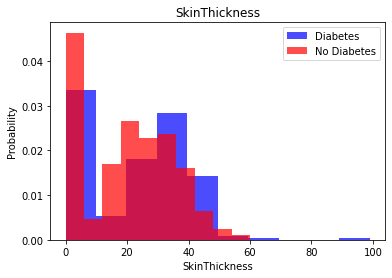

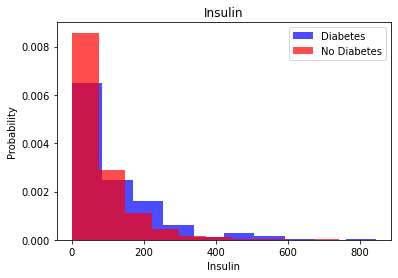

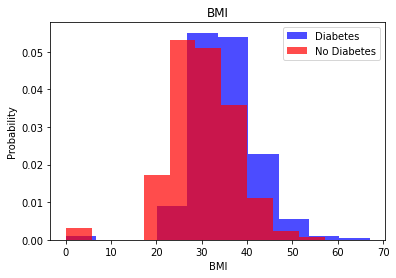

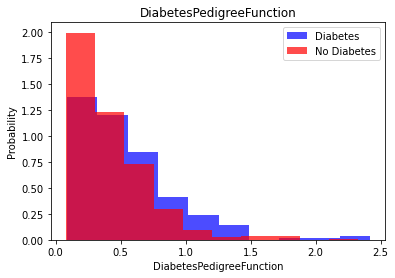

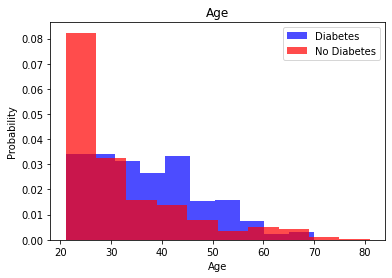

In [7]:
# Creating histograms for each feature.

for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    
    # Create histograms for diabetes cases (Outcome == 1) and no diabetes cases (Outcome == 0).
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label='Diabetes', alpha=0.7, density=True)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label='No Diabetes', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()


## Data Scaling with StandardScaler

We standardized the variables in our dataset due to their varying scales. Standardization is a crucial preprocessing step that ensures all features have a similar scale. This uniformity is essential for enhancing the stability and convergence of our neural network model during training.

In [8]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# Horizontally stack (hstack) combines features with reshaped target variable 'y'.
# Reshaping is done to match dimensions of both X and y.

data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

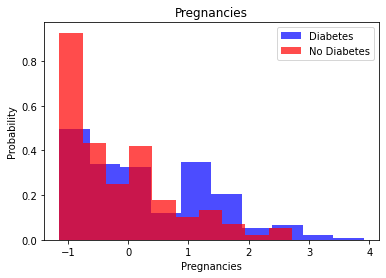

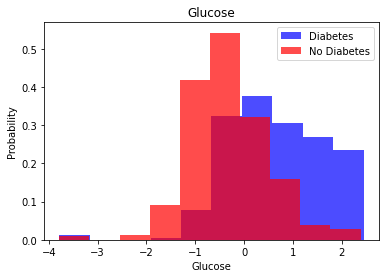

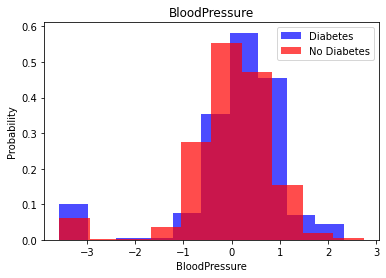

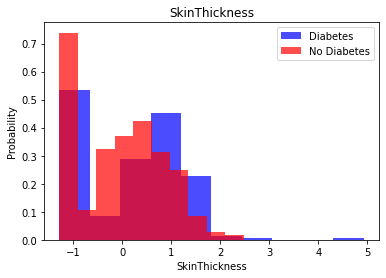

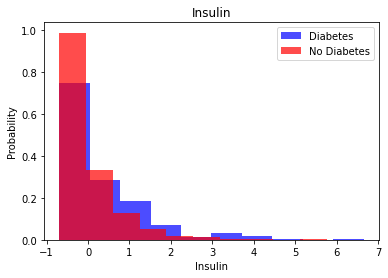

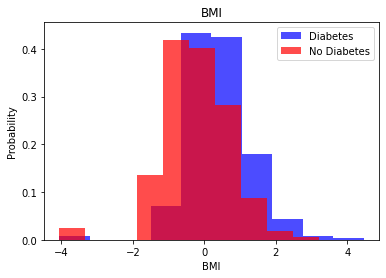

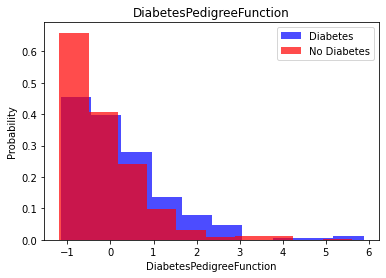

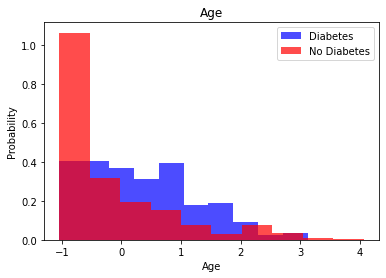

In [11]:
# Create histograms for each feature and compare the distribution of values for diabetes and no diabetes cases.

for i in range(len(transformed_df.columns[:-1])):
    label = transformed_df.columns[i]
    
    # Create histograms for diabetes cases (Outcome == 1) and no diabetes cases (Outcome == 0).
    plt.hist(transformed_df[transformed_df['Outcome'] == 1][label], color='blue', label='Diabetes', alpha=0.7, density=True)
    plt.hist(transformed_df[transformed_df['Outcome'] == 0][label], color='red', label='No Diabetes', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()


## Balancing the Dataset to Address Class Imbalance


In [12]:
# Count of 'Diabetes' or 'No Diabetes' patients currently

len(transformed_df[transformed_df.Outcome == 1]), len(transformed_df[transformed_df.Outcome == 0])

(268, 500)

#### Class Imbalance

With 268 'Diabetes' and 500 'No Diabetes' cases in our dataset, addressing class imbalance is crucial for balanced neural network training.


In [13]:
# Perform random oversampling to balance the dataset.
# Create a new DataFrame 'transformed_df' with the balanced data.

over = RandomOverSampler()

X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [14]:
# Count of patients after rebalancing

len(transformed_df[transformed_df.Outcome == 1]), len(transformed_df[transformed_df.Outcome == 0])

(500, 500)

In [15]:
transformed_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.057299,0.143575,0.010729,0.012580,0.028953,0.087120,0.044905,0.066804,0.50000
std,1.017009,1.028253,1.020329,1.013762,1.028412,0.973746,1.014694,0.985482,0.50025
min,-1.141852,-3.783654,-3.572597,-1.288212,-0.692891,-4.060474,-1.189553,-1.041549,0.00000
25%,-0.844885,-0.591345,-0.263941,-1.288212,-0.692891,-0.506735,-0.673868,-0.701198,0.00000
50%,-0.250952,0.050247,0.149641,0.217261,-0.536598,0.089785,-0.269927,-0.190672,0.50000
75%,0.639947,0.785730,0.563223,0.781814,0.479300,0.648230,0.530404,0.660206,1.00000
max,3.906578,2.444478,2.734528,4.921866,6.652839,4.455807,5.883565,4.063716,1.00000


----

## Model Development and Evaluation


In [16]:
# Split data into training, validation and testing sets of 60:20:20 ratio.

X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [17]:
# Define a sequential neural network model with the following architecture:

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(16, activation='relu'), # - Input layer with 16 units
                            tf.keras.layers.Dense(16, activation='relu'), # - Hidden layer with 16 units
                            tf.keras.layers.Dense(1, activation='sigmoid'), # - Output layer with 1 unit and sigmoid activation function (for binary classification).
])

In [18]:
# Compile the neural network model with Adam optimizer, binary cross-entropy loss, and accuracy metric.


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
             )

In [19]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 3ms/step - loss: 0.6707 - accuracy: 0.5217


[0.6707044839859009, 0.5216666460037231]

In [20]:
model.evaluate(X_val, y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5200


[0.6776232123374939, 0.5199999809265137]

In [21]:
X_train.shape, y_train.shape

((600, 8), (600,))

In [22]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=[X_val, y_val])

Epoch 1/20
38/38 [==============================] - 1s 7ms/step - loss: 0.6523 - accuracy: 0.5700 - val_loss: 0.6387 - val_accuracy: 0.6200
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6183 - accuracy: 0.6767 - val_loss: 0.6100 - val_accuracy: 0.6650
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.7133 - val_loss: 0.5873 - val_accuracy: 0.7300
Epoch 4/20
38/38 [==============================] - 0s 12ms/step - loss: 0.5744 - accuracy: 0.7117 - val_loss: 0.5658 - val_accuracy: 0.7400
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.7117 - val_loss: 0.5482 - val_accuracy: 0.7550
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5448 - accuracy: 0.7067 - val_loss: 0.5348 - val_accuracy: 0.7600
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5332 - accuracy: 0.7017 - val_loss: 0.5219 - val_accuracy: 0.7650
Epoch 8/20
38/38 [=

In [23]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.7900


[0.49070411920547485, 0.7900000214576721]

# Conclusion

In summary, our neural network model demonstrated its ability to predict the presence or absence of diabetes with a test accuracy of approximately 79%. This achievement signifies a reasonably high level of accuracy in our predictions. 

While our model performed well, there are opportunities for further enhancement:

- **Model Refinement**: Fine-tuning the model architecture and hyperparameters could lead to even better results. Experimenting with different neural network architectures or regularization techniques might be beneficial.

- **Exploring Alternative Algorithms**: Future work could involve exploring other machine learning algorithms beyond neural networks. Different models may offer unique advantages in predicting diabetes.

- **Hyperparameter Optimization**: A more exhaustive search for optimal hyperparameters could potentially boost the model's accuracy further.

In conclusion, this project lays the groundwork for leveraging machine learning to address critical healthcare challenges such as diabetes prediction. It underscores the potential for continued research and development in this area, with the aim of improving the accuracy and applicability of predictive models for real-world healthcare scenarios.
